<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/Loaning_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
filename='loan_bank_dataset.csv'
df=pd.read_csv(filename)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df.shape

(614, 13)

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

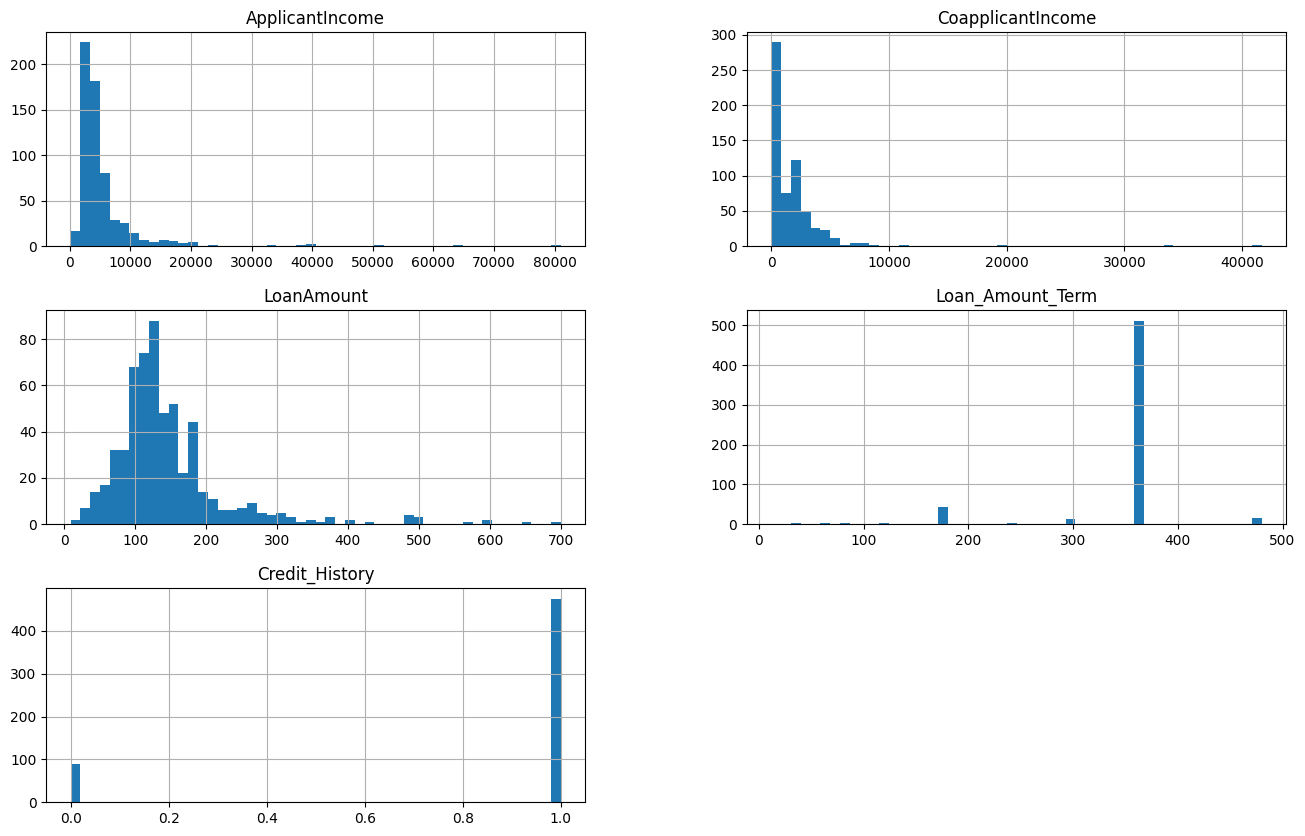

In [27]:
df.hist(bins=50, figsize=(16,10))
plt.show()

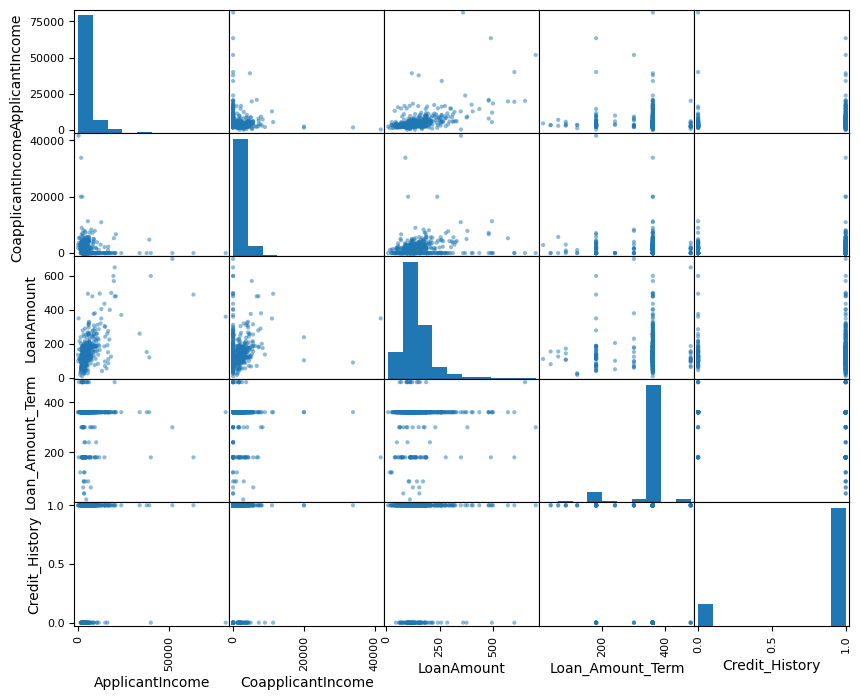

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 8), diagonal='hist')
plt.show()

In this graph we can see
-loan amount has little correlation with Applicant income ad Coapplicant income
Other numerical amounts has no releted item

Using this information we can save some none values by altering them with suffician one in reletional columns

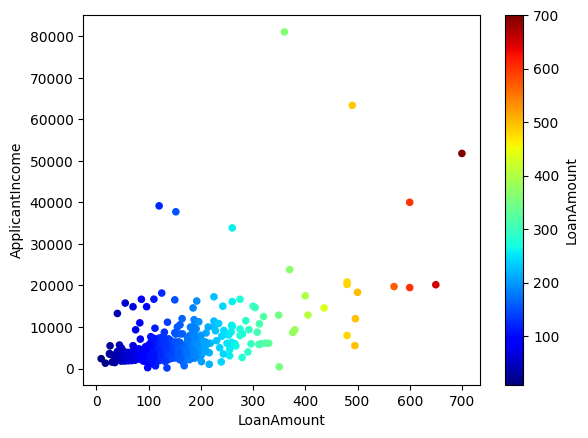

In [29]:
df.plot(kind='scatter', x='LoanAmount', y='ApplicantIncome',c='LoanAmount', cmap='jet')
plt.show()

The graph is clearly showing we can replace none values in LoanAmount column with median value.

In [30]:
median=df['LoanAmount'].median()
df['LoanAmount'].fillna(median, inplace=True)

In [31]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y


In [32]:
df.drop('Loan_ID', axis=1, inplace=True)

In [37]:
df.dropna(inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             499 non-null    object 
 1   Married            499 non-null    object 
 2   Dependents         499 non-null    object 
 3   Education          499 non-null    object 
 4   Self_Employed      499 non-null    object 
 5   ApplicantIncome    499 non-null    int64  
 6   CoapplicantIncome  499 non-null    float64
 7   LoanAmount         499 non-null    float64
 8   Loan_Amount_Term   499 non-null    float64
 9   Credit_History     499 non-null    float64
 10  Property_Area      499 non-null    object 
 11  Loan_Status        499 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 50.7+ KB


In [82]:
df['Loan_Status'].replace({'Y':1,'N':0}, inplace=True)

In [83]:
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)
df['Dependents']=df['Dependents'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             499 non-null    object 
 1   Married            499 non-null    object 
 2   Dependents         499 non-null    int64  
 3   Education          499 non-null    object 
 4   Self_Employed      499 non-null    object 
 5   ApplicantIncome    499 non-null    int64  
 6   CoapplicantIncome  499 non-null    float64
 7   LoanAmount         499 non-null    float64
 8   Loan_Amount_Term   499 non-null    float64
 9   Credit_History     499 non-null    float64
 10  Property_Area      499 non-null    object 
 11  Loan_Status        499 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 50.7+ KB


In [84]:
X=df.drop('Loan_Status', axis=1)
Y=df['Loan_Status'].copy()

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=10)


In [85]:
col=['Gender', 'Married','Education','Self_Employed','Property_Area']
str_values=X_train[col].copy()
num_values=X_train.drop(columns=col, axis=1).copy()

In [95]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline=Pipeline([
    ('std_scaler', StandardScaler())
])

num_pipeline.fit_transform(num_values)

num_list=list(num_values)
str_list=list(str_values)
full_pipeline=ColumnTransformer([
     ('str_pipeline', OrdinalEncoder(), str_list),
     ('num_pipeline', num_pipeline, num_list)
])

In [96]:
X_prepared=full_pipeline.fit_transform(X_train)
X_prepared[:4]

array([[ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        -0.69952287, -0.48440044,  0.05029119, -0.4696633 ,  0.26935585,
         0.42482158],
       [ 1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         2.57449033, -0.40931881,  0.35922113,  0.20527869,  0.26935585,
        -2.3539294 ],
       [ 1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.93748373, -0.26053321, -0.60291889, -0.69464397,  0.26935585,
         0.42482158],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         0.93748373, -0.20887154, -0.05345394, -0.17851186,  0.26935585,
         0.42482158]])

######Machine Learning Algorithms

In [97]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_prepared,Y_train)

SVC()

In [99]:
predicted_Y=classifier.predict(X_prepared)
pd.DataFrame({'Real':Y_train, 'Predicted':predicted_Y})

,Real,Predicted
496,1,1
7,0,0
274,1,1
139,0,1
394,1,1
...,...,...
596,0,1
552,1,1
369,0,0
46,1,1


In [102]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predicted_Y, Y_train)
print('accuracy: ', accuracy)

accuracy:  0.8270676691729323


==================Start testing with test dataframe

In [103]:
X_prepared=full_pipeline.transform(X_test)

In [104]:
Y_predicted=classifier.predict(X_prepared)
test_accuracy=accuracy_score(Y_predicted,Y_test)
print('Accuracy test: ', test_accuracy)

Accuracy test:  0.78
